<a href="https://colab.research.google.com/github/kailasa-Nischal/ML/blob/main/Paddy_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/yvkrishna/paddy_disease_classification.git

Cloning into 'paddy_disease_classification'...
remote: Enumerating objects: 591, done.
remote: Counting objects: 100% (591/591), done.
remote: Compressing objects: 100% (571/571), done.
remote: Total 591 (delta 58), reused 515 (delta 20), pack-reused 0
Receiving objects: 100% (591/591), 43.21 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 851.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 45.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Suc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflowjs as tfjs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from os import path
from PIL import Image, ImageFilter, ImageDraw
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from scipy import interp
from itertools import cycle
import pandas as pd
import seaborn as sn
import shutil
from sklearn.model_selection import train_test_split
from google.colab import files

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [ ]:
# importing all tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Dropout, Dense, Flatten
from tensorflow.keras import Model

In [ ]:
os.chdir('/content')

Numpy is used to manipulating and using arrays of data easily.

Pandas helps us to play with the data .

Matplotlib is used to visulaize the data.

In [ ]:
os.chdir('paddy_disease_classification/rice_leaf_diseases')
path = os.getcwd()
training_classes = [f.name for f in os.scandir(path) if f.is_dir()]
print(training_classes)

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


Image Pre Processing Steps

In [ ]:
def applyMedian(folder):
  '''
    Applies Meadian Filter to all the images in the given folder.
    Args :
      Folder : (str). : Image_directory
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()

  for image in tqdm(list(os.listdir(current_path))):
    img = cv2.imread(image)
    # applies median filter to the image.
    median = cv2.medianBlur(img, 5)
    # saving the image by adding the blur feature.
    im = Image.fromarray(median)
    im.save(image)
  os.chdir(previous_path)

In [ ]:
for folder in training_classes:
  applyMedian(folder)

100%|██████████| 40/40 [00:03<00:00, 12.37it/s]


In [ ]:
os.chdir('/content')

In [ ]:
base_dir = 'paddy_disease_classification'
train_dir = os.path.join(base_dir, 'rice_leaf_diseases')

In [ ]:
train_bact_leaf_smut_dir = os.path.join(train_dir, 'Bacterial leaf blight')  # directory with our training cat pictures
train_brown_spot_dir = os.path.join(train_dir, 'Brown spot')  # directory with our training dog pictures
train_leaf_smut_dir = os.path.join(train_dir, 'Leaf smut')  # directory with our training dog pictures

In [ ]:
num_bact_leaf_smut_tr = len(os.listdir(train_bact_leaf_smut_dir))
num_brown_spot_tr = len(os.listdir(train_brown_spot_dir))
num_leaf_smut_tr = len(os.listdir(train_leaf_smut_dir))

total_train = num_bact_leaf_smut_tr + num_brown_spot_tr + num_leaf_smut_tr

In [ ]:
print('Data before Data augumentation')
print("--")
print('total training Bacterial leaf blight images:', num_bact_leaf_smut_tr)
print('total training Brown spot images:', num_brown_spot_tr)
print('total training Leaf smut images:', num_leaf_smut_tr)
print("--")
print("Total training images:", total_train)

Data before Data augumentation
--
total training Bacterial leaf blight images: 40
total training Brown spot images: 40
total training Leaf smut images: 40
--
Total training images: 120


In [ ]:
BATCH_SIZE = 20
IMG_SHAPE  = 299

In [ ]:
def rotateImages(rotationAmt,folder):
  '''
    rotateImages is used as one of the image augumentation techniques to
    increase the dataset thereby increasing the accuracy.

    rotateImages function rotates images in the current directory.

   Args:
   rotationAmt : int. The value of rotation in the image.

  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()

  total_images = 0

  for image in tqdm(list(os.listdir(current_path))):
    # check if the image is already rotated.
    if (image.find("rot") == -1):
      img = Image.open(image)
      # get the image name
      img_name = list(image.split("."))[0]
      rotimg = img.rotate(rotationAmt)
      # saving the image with its rotation information as well.
      rotimg.save(img_name+"rot"+str(rotationAmt)+".jpg")
      img.close()
      total_images+=1
  print(total_images)
  os.chdir(previous_path)

In [ ]:
def addBlur(folder):
  '''
    Adds Blur to the images.
    This function will list out all the images in the current directory and
    applies blur to the image and saves it in the same folder.
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  # for each image in the current directory
  total_images = 0

  for image in tqdm(list(os.listdir(current_path))):
    if (image.find("rot") == -1):
      img = Image.open(image)
      # adds blur to the image using ImageFilter.Blur
      blured_image = img.filter(ImageFilter.BLUR)
      # get the image name
      img_name = list(image.split("."))[0]
      # saving the image by adding the blur feature.
      blured_image.save(img_name+"blur.jpg")
      total_images+=1
  print(total_images)
  os.chdir(previous_path)


In [ ]:
def addUniformNoise(folder):
  '''
    Adds Uniform Noise to the images.
    This function will list out all the images in the current directory and
    applies Uniform Noise to the image and saves it in the same folder.
    Args :
    img_loc: list. list containing image locations
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  total_images = 0

  # for each image in the current directory
  for image in tqdm(list(os.listdir(current_path))):
    if (image.find("rot") == -1 and image.find("blur") == -1 and image.find("uniform_noise") == -1):
      img_name = list(image.split("."))[0]
      image = cv2.imread(img_name)
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      # creating random noise
      uniform_noise = np.zeros((image.shape[0], image.shape[1]),dtype=np.uint8)
      cv2.randu(uniform_noise,0,255)
      uniform_noise = (uniform_noise*0.2).astype(np.uint8)
      # Adding noise to the image
      noisy_image2 = cv2.add(gray,uniform_noise)
      noisy_image2 = cv2.cvtColor(noisy_image2,cv2.COLOR_GRAY2RGB)
      # get the image name
      img_name = list(image_name.split("."))[0]
      # saving the image by adding the uniform_noise feature.
      cv2.imwrite(img_name+"uniform_noise.jpg",noisy_image2)
      total_images +=1
  print(total_images)
  os.chdir(previous_path)

In [ ]:
def horizontalFlip(folder):
  '''
    Adds Blur to the images.
    This function will list out all the images in the current directory and
    applies blur to the image and saves it in the same folder.
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  # for each image in the current directory
  total_images = 0

  for image in tqdm(list(os.listdir(current_path))):
    if (image.find("rot") == -1 and image.find("blur") == -1):
      img = cv2.imread(image)
      # Flips the image
      flip = cv2.flip(img, 1)
      # get the image name
      img_name = list(image.split("."))[0]
      # saving the image by adding the flip feature.
      cv2.imwrite(img_name+"flip.jpg",flip)
      total_images+=1
  print(total_images)
  os.chdir(previous_path)


In [ ]:
os.chdir('paddy_disease_classification/testing')
for folder in training_classes:
  # Rotating images of train_label_img_locations with an angle of 90 deg.
  rotateImages(90,folder)

  # Blur images in train_label_img_locations
  addBlur(folder)

  # # Adds Uniform Noise to images in train_label_img_locations
  # addUniformNoise(folder)

  # horizontally flips the images
  horizontalFlip(folder)

  print()
os.chdir('/content')

100%|██████████| 5/5 [00:00<00:00,  9.15it/s]


5


100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


5


100%|██████████| 15/15 [00:00<00:00, 16.45it/s]


5



100%|██████████| 5/5 [00:00<00:00, 147.24it/s]


5


100%|██████████| 10/10 [00:00<00:00, 42.01it/s]


5


100%|██████████| 15/15 [00:00<00:00, 195.97it/s]


5



100%|██████████| 5/5 [00:00<00:00, 12.87it/s]


5


100%|██████████| 10/10 [00:01<00:00,  5.33it/s]


5


100%|██████████| 15/15 [00:00<00:00, 19.89it/s]

5



In [ ]:
os.chdir('paddy_disease_classification/rice_leaf_diseases')
for folder in training_classes:
  # Rotating images of train_label_img_locations with an angle of 90 deg.
  rotateImages(90,folder)

  # Blur images in train_label_img_locations
  addBlur(folder)

  # # Adds Uniform Noise to images in train_label_img_locations
  # addUniformNoise(folder)

  # horizontally flips the images
  horizontalFlip(folder)

  print()
os.chdir('/content')

100%|██████████| 40/40 [00:02<00:00, 16.83it/s]


40


100%|██████████| 80/80 [00:20<00:00,  3.95it/s]


40


100%|██████████| 120/120 [00:06<00:00, 18.94it/s]


40



100%|██████████| 40/40 [00:00<00:00, 67.19it/s]


40


100%|██████████| 80/80 [00:03<00:00, 22.26it/s]


40


100%|██████████| 120/120 [00:01<00:00, 76.25it/s]


40



100%|██████████| 40/40 [00:00<00:00, 49.71it/s]


40


100%|██████████| 80/80 [00:06<00:00, 13.25it/s]


40


100%|██████████| 120/120 [00:03<00:00, 38.09it/s]

40



In [ ]:
base_dir = 'paddy_disease_classification'
train_dir = os.path.join(base_dir, 'rice_leaf_diseases')

In [ ]:
train_bact_leaf_smut_dir = os.path.join(train_dir, 'Bacterial leaf blight')  # directory with our training cat pictures
train_brown_spot_dir = os.path.join(train_dir, 'Brown spot')  # directory with our training dog pictures
train_leaf_smut_dir = os.path.join(train_dir, 'Leaf smut')  # directory with our training dog pictures

In [ ]:
num_bact_leaf_smut_tr = len(os.listdir(train_bact_leaf_smut_dir))
num_brown_spot_tr = len(os.listdir(train_brown_spot_dir))
num_leaf_smut_tr = len(os.listdir(train_leaf_smut_dir))

total_train = num_bact_leaf_smut_tr + num_brown_spot_tr + num_leaf_smut_tr

In [ ]:
print('Data after Data augumentation')
print("--")
print('total training Bacterial leaf blight images:', num_bact_leaf_smut_tr)
print('total training Brown spot images:', num_brown_spot_tr)
print('total training Leaf smut images:', num_leaf_smut_tr)
print("--")
print("Total training images:", total_train)

Data after Data augumentation
--
total training Bacterial leaf blight images: 160
total training Brown spot images: 160
total training Leaf smut images: 160
--
Total training images: 480



  Dataset After Data Augumentation

number of images in training dataset is 480



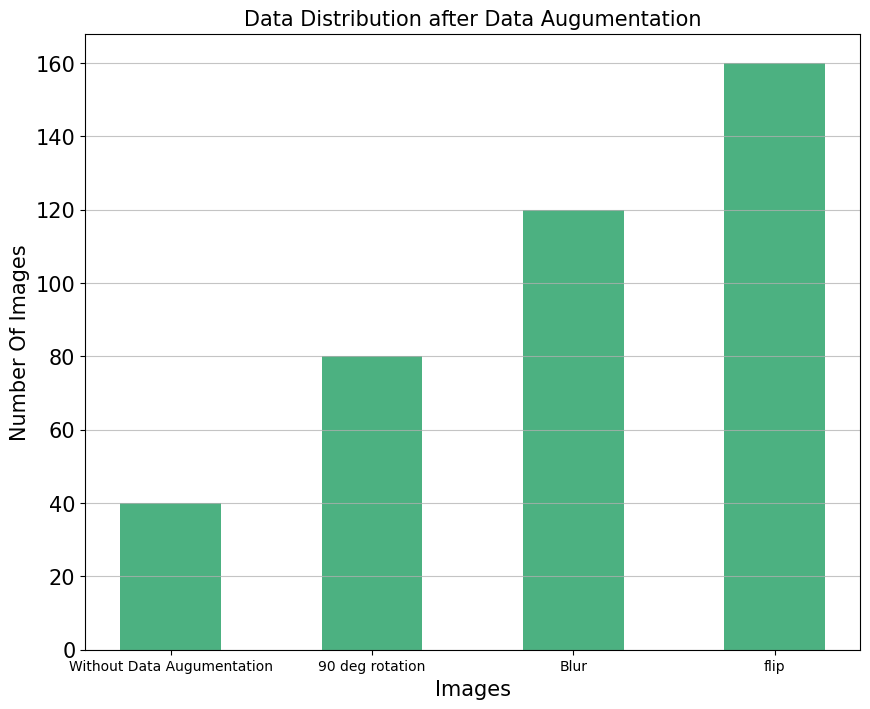

In [ ]:
num_imgs_train = total_train

print('''
  Dataset After Data Augumentation
''')
print("number of images in training dataset is {}".format(num_imgs_train))
print()
x = np.arange(4)
y = [40, 80, 120, 160]

plt.figure(figsize=[10,8])

plt.bar(x,y, width = 0.5, color='#00904C',alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Images',fontsize=15, color="#000")
plt.xticks(x,('Without Data Augumentation',"90 deg rotation","Blur","flip"), color="#000")
plt.yticks(fontsize=15, color="#000")
plt.ylabel('Number Of Images',fontsize=15, color="#000")
plt.title('Data Distribution after Data Augumentation',fontsize=15, color="#000")
plt.show()

In [ ]:
# # This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20,20))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()

In [ ]:
# # Putting All Together

# image_gen_train = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=90,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
#                                                      directory=train_dir,
#                                                      shuffle=True,
#                                                      target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                      class_mode='categorical')

In [ ]:
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [ ]:
# rotate = plt.imread('Rotation.png')
# zoom = plt.imread('Zoom.png')
# flipping = plt.imread('flipping.png')

# plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

# plt.subplot(3,1,1)
# plt.imshow(rotate,aspect='auto')
# plt.title('Rotation',fontsize=40)
# plt.xticks([])
# plt.yticks([])
# plt.subplot(3,1,2)
# plt.imshow(zoom,aspect='auto')
# plt.title('Zoom',fontsize=40)
# plt.xticks([])
# plt.yticks([])
# plt.subplot(3,1,3)
# plt.imshow(flipping,aspect='auto')
# plt.title('Flipping',fontsize=40)
# plt.xticks([])
# plt.yticks([])

In [ ]:
# initial1 = plt.imread('1.JPG')
# initial2 = plt.imread('2.JPG')
# # middle = plt.imread('3.png')
# # final = plt.imread('4.png')


# plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

# plt.subplot(2,2,1)
# plt.imshow(initial1,aspect='auto')
# # plt.title("Initial Layer ( 'conv2d_14' )",fontsize=40)
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,2,2)
# plt.imshow(initial2,aspect='auto')
# # plt.title("Initial Layer ( 'conv2d_16' )",fontsize=40)
# plt.xticks([])
# plt.yticks([])
# # plt.subplot(2,2,3)
# # plt.imshow(middle,aspect='auto')
# # plt.title("Middle Layer ( 'conv2d_114' )",fontsize=40)
# # plt.xticks([])
# # plt.yticks([])
# # plt.subplot(2,2,4)
# # plt.imshow(final,aspect='auto')
# # plt.title("Last Layer ( 'block8_1_conv' )",fontsize=40)
# # plt.xticks([])
# # plt.yticks([])

In [ ]:
# Deenin in reference ga ikkade unchu. Dont change the code
# img = cv2.imread('leaf.JPG')
# leaf_img = plt.imread('leaf.JPG')
# median = cv2.medianBlur(img, 5)
# compare = np.concatenate((img, median), axis=1) #side by side comparison
# plt.subplot(1,2,1)
# plt.imshow(leaf_img,aspect='auto')
# plt.subplot(1,2,2)
# plt.imshow(median,aspect='auto')

In [ ]:
os.chdir('paddy_disease_classification')
!mkdir train
os.chdir('/content')

In [ ]:
def create_dataset(folder):
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  # for each image in the current directory
  total_images = 0

  for image in tqdm(list(os.listdir(current_path))):

    shutil.move(image, "/content/paddy_disease_classification/train")

    if (folder=='Bacterial leaf blight'):
      img_label[image] = np.asarray([1,0,0], dtype=np.float32)
    elif (folder=='Brown spot'):
      img_label[image] = np.asarray([0,0,1], dtype=np.float32)
    else:
      img_label[image] = np.asarray([0,1,0], dtype=np.float32)

  os.chdir(previous_path)

In [ ]:
os.chdir('paddy_disease_classification/rice_leaf_diseases')

img_label = {}

for folder in training_classes:
  create_dataset(folder)

os.chdir('/content')

100%|██████████| 160/160 [00:00<00:00, 14155.30it/s]


In [ ]:
print(img_label)

{'DSC_0379.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0388flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0379blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0385blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0395.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0375flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0392blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0392rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0703.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0388blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0386rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0382rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0703blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0402blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0403flip.jpg': array([1., 0., 0.], dtype=float32),


  printing random images with their data augumented versions.

Column 1 images are taken from the dataset
Column 2 images represent + 90 degree rotation of images from the dataset
Column 3 images represent blurred version of images from the dataset
Column 4 images represent flip version of images from the dataset



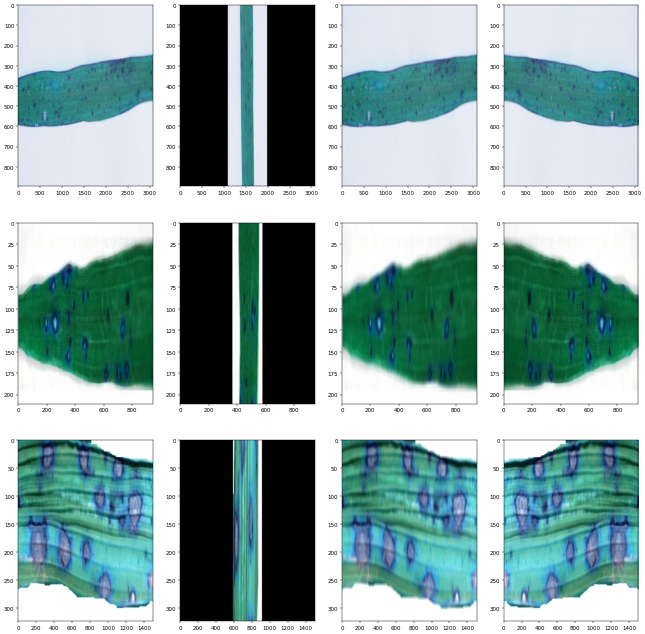

In [ ]:
print('''
  printing random images with their data augumented versions.
''')

actual_training_data_length = 480
j=1
cnt=3
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

for i in range(20):
  # Generating random number
  image_index = np.random.randint(actual_training_data_length)

  image = list(img_label.keys())[image_index]
  img_name = list(image.split("."))[0]

  if (len(img_name)==8 and cnt!=0):
    img_name1 = img_name + "rot90.jpg"
    img_name2 = img_name + "blur.jpg"
    img_name3 = img_name + "flip.jpg"

    plt.subplot(3,4,j)
    img = Image.open("paddy_disease_classification/train/"+image)
    plt.imshow(img,aspect='auto')
    # plt.title(image,fontsize=30,color="blue")
    plt.subplot(3,4,j+1)
    img = Image.open("paddy_disease_classification/train/"+img_name1)
    plt.imshow(img,aspect='auto')
    #plt.title(img_name1,fontsize=30,color="red")
    plt.subplot(3,4,j+2)
    img = Image.open("paddy_disease_classification/train/"+img_name2)
    plt.imshow(img,aspect='auto')
    #plt.title(img_name2,fontsize=30,color="red")
    plt.subplot(3,4,j+3)
    img = Image.open("paddy_disease_classification/train/"+img_name3)
    plt.imshow(img,aspect='auto')
    #plt.title(img_name3,fontsize=30,color="red")
    j+=4
    cnt-=1
    if (cnt==0):
      break

print("Column 1 images are taken from the dataset")
print("Column 2 images represent + 90 degree rotation of images from the dataset")
print("Column 3 images represent blurred version of images from the dataset")
print("Column 4 images represent flip version of images from the dataset")
print()

In [ ]:
print(img_label)

{'DSC_0379.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0388flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0379blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0385blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0395.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0375flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398flip.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0392blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0392rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0703.JPG': array([1., 0., 0.], dtype=float32), 'DSC_0388blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0386rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0382rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0703blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0402blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398rot90.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0398blur.jpg': array([1., 0., 0.], dtype=float32), 'DSC_0403flip.jpg': array([1., 0., 0.], dtype=float32),

In [ ]:
def load_image(image_path):
    '''
      Converts the image to size = (299,299,3) and normalizes the data
      Args :
      image_path : str. Image path for processing the image
    '''
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    # Normalizing the image
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
# Test code for checking the image shape and max value of image
os.chdir('paddy_disease_classification/train')
image, path = load_image('DSC_0112blur.jpg')
print(f"image has a shape of {image.shape}")
print(tf.reduce_max(image))
os.chdir('/content')

image has a shape of (299, 299, 3)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# differentiating the complete dataset into training and validating datasets.
img_name_train, img_name_val, output_label_train, output_label_val = train_test_split(
                                                                    list(img_label.keys()),
                                                                    list(img_label.values()),
                                                                    test_size=0.1,
                                                                    random_state=0)

print(f'Length of training images = {len(img_name_train)}')
print(f'Length of training labels = {len(output_label_train)}')
print(f"Length of validating images = {len(img_name_val)}")
print(f'Length of validating labels = {len(output_label_val)}')

Length of training images = 432
Length of training labels = 432
Length of validating images = 48
Length of validating labels = 48


In [ ]:
os.chdir('paddy_disease_classification/train')

channels = 3

train_images = np.ndarray(shape=(len(img_name_train), IMG_SHAPE, IMG_SHAPE, channels), dtype=np.float32)
train_labels = np.ndarray(shape=(len(output_label_train), 3 ), dtype=np.float32)
val_images = np.ndarray(shape=(len(img_name_val), IMG_SHAPE, IMG_SHAPE, channels), dtype=np.float32)
val_labels = np.ndarray(shape=(len(output_label_val), 3 ), dtype=np.float32)

i=0
for image in tqdm(list(img_name_train)):
  x, path = load_image(image)
  train_images[i] = x
  train_labels[i] = np.asarray(output_label_train[i])
  i += 1


i=0
for image in tqdm(list(img_name_val)):
  x, path = load_image(image)
  val_images[i] = x
  val_labels[i] = np.asarray(output_label_val[i])
  i += 1

os.chdir('/content')

100%|██████████| 48/48 [00:00<00:00, 65.69it/s]


In [ ]:
train_images.shape, train_labels.shape

((432, 299, 299, 3), (432, 3))

In [ ]:
paddyNet = Sequential()

# Unit 1
paddyNet.add(Conv2D(32, (5,5), activation='relu', input_shape=(299, 299, 3)))
paddyNet.add(MaxPooling2D(pool_size=(2, 2)))

# Unit 2
paddyNet.add(Conv2D(16, (5,5), activation='relu'))
paddyNet.add(MaxPooling2D(pool_size=(2, 2)))

paddyNet.add(Conv2D(8, (5,5), activation='relu'))
paddyNet.add(MaxPooling2D(pool_size=(2, 2)))

#unit 4
paddyNet.add(Flatten())
paddyNet.add(Dense(32, activation="relu"))
paddyNet.add(Dense(3, activation="sigmoid"))

In [ ]:
paddyNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 295, 295, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 147, 147, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 143, 143, 16)      12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 71, 71, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 67, 67, 8)         3208      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 33, 33, 8)         0

In [ ]:
paddyNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS=10

paddyNet_history = paddyNet.fit(train_images, train_labels, epochs=EPOCHS,
                    validation_data=(val_images, val_labels))

Epoch 1/10
14/14 [==============================] - 18s 196ms/step - loss: 1.1070 - accuracy: 0.4167 - val_loss: 0.9798 - val_accuracy: 0.5208
Epoch 2/10
14/14 [==============================] - 1s 81ms/step - loss: 0.9482 - accuracy: 0.5370 - val_loss: 0.8428 - val_accuracy: 0.7083
Epoch 3/10
14/14 [==============================] - 1s 66ms/step - loss: 0.8332 - accuracy: 0.6319 - val_loss: 0.8069 - val_accuracy: 0.7292
Epoch 4/10
14/14 [==============================] - 1s 65ms/step - loss: 0.7263 - accuracy: 0.6852 - val_loss: 0.6888 - val_accuracy: 0.6875
Epoch 5/10
14/14 [==============================] - 1s 65ms/step - loss: 0.5348 - accuracy: 0.7778 - val_loss: 0.8311 - val_accuracy: 0.6458
Epoch 6/10
14/14 [==============================] - 1s 67ms/step - loss: 0.4038 - accuracy: 0.8333 - val_loss: 0.5413 - val_accuracy: 0.7292
Epoch 7/10
14/14 [==============================] - 1s 65ms/step - loss: 0.2799 - accuracy: 0.8981 - val_loss: 0.5658 - val_accuracy: 0.7083
Epoch 8/10


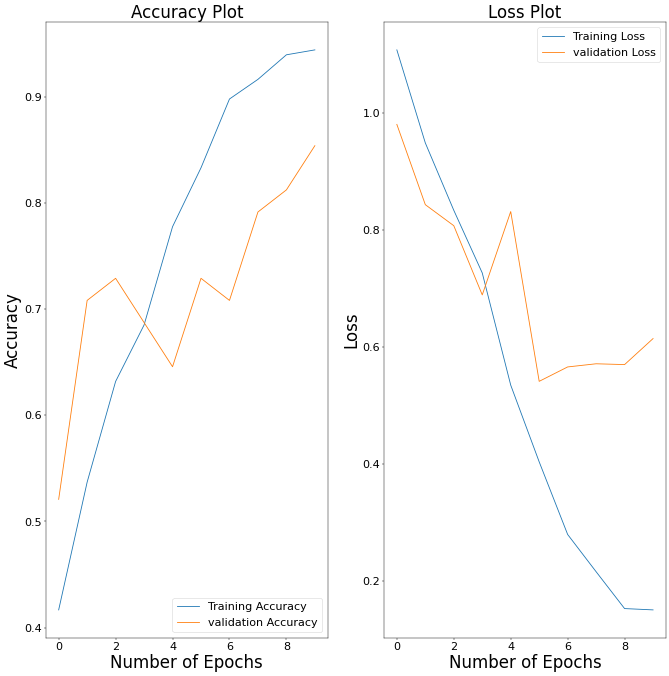

In [ ]:
acc = paddyNet_history.history['accuracy']
val_acc = paddyNet_history.history['val_accuracy']

loss = paddyNet_history.history['loss']
val_loss = paddyNet_history.history['val_loss']

epochs_range = range(EPOCHS)
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right',fontsize=20)
plt.title('Accuracy Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label = 'validation Loss')
plt.legend(loc='upper right',fontsize=20)
plt.title('Loss Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
# Pre trained model
inception_resnet_V2_pre_trained = InceptionResNetV2(include_top=True, weights='imagenet', pooling=None)

225209952/225209952 [==============================] - 11s 0us/step


In [ ]:
for layer in inception_resnet_V2_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='softmax')(inception_resnet_V2_pre_trained.output)
inception_resnet_V2 = Model(inputs=inception_resnet_V2_pre_trained.input, outputs=predictions)

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.9999, epsilon=1e-08,
    amsgrad=True, name='Adam' )

inception_resnet_V2.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy'])

EPOCHS = 20
history_inception_resnet_v2 = inception_resnet_V2.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    batch_size=10,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
44/44 [==============================] - 131s 556ms/step - loss: 1.0977 - accuracy: 0.4097 - val_loss: 1.0988 - val_accuracy: 0.3542
Epoch 2/20
44/44 [==============================] - 15s 352ms/step - loss: 1.0916 - accuracy: 0.6065 - val_loss: 1.0871 - val_accuracy: 0.4583
Epoch 3/20
44/44 [==============================] - 16s 356ms/step - loss: 1.0767 - accuracy: 0.7269 - val_loss: 1.0769 - val_accuracy: 0.5833
Epoch 4/20
44/44 [==============================] - 16s 363ms/step - loss: 1.0635 - accuracy: 0.8519 - val_loss: 1.0647 - val_accuracy: 0.6667
Epoch 5/20
44/44 [==============================] - 16s 366ms/step - loss: 1.0550 - accuracy: 0.8750 - val_loss: 1.0577 - val_accuracy: 0.7917
Epoch 6/20
44/44 [==============================] - 16s 369ms/step - loss: 1.0524 - accuracy: 0.8727 - val_loss: 1.0530 - val_accuracy: 0.8333
Epoch 7/20
44/44 [==============================] - 17s 378ms/step - loss: 1.0490 - accuracy: 0.8958 - val_loss: 1.0475 - val_accuracy: 0.895

In [ ]:
acc = history_inception_resnet_v2.history['accuracy']
val_acc = history_inception_resnet_v2.history['val_accuracy']

loss = history_inception_resnet_v2.history['loss']
val_loss = history_inception_resnet_v2.history['val_loss']

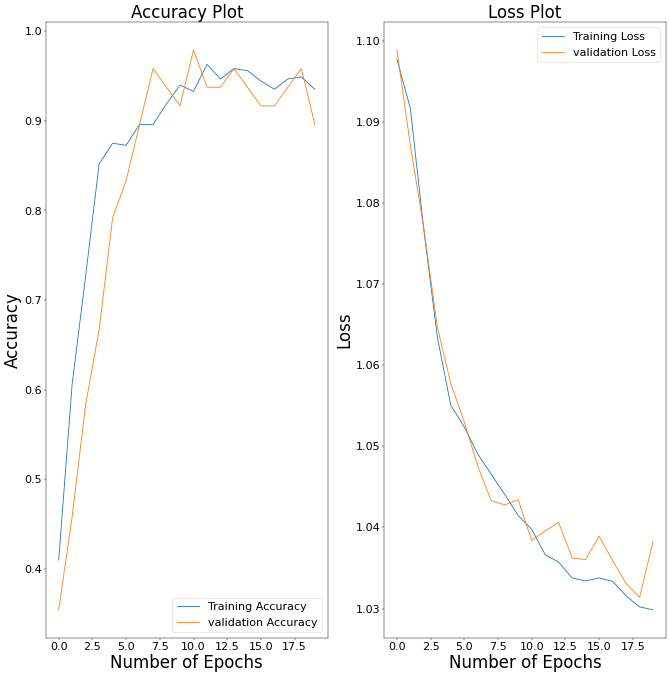

In [ ]:
epochs_range = range(EPOCHS)
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right',fontsize=20)
plt.title('Accuracy Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label = 'validation Loss')
plt.legend(loc='upper right',fontsize=20)
plt.title('Loss Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# acc = history_inception_resnet_v2.history['accuracy']
# val_acc = history_inception_resnet_v2.history['val_accuracy']

# loss = history_inception_resnet_v2.history['loss']
# val_loss = history_inception_resnet_v2.history['val_loss']

# epochs_range = range(5)
# plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc[0:len(acc)-1], label='Training Accuracy')
# plt.plot(epochs_range, val_acc[0:len(val_acc)-1], label = 'validation Accuracy')
# plt.legend(loc='lower right',fontsize=20)
# plt.title('Accuracy Plot',fontsize=30)
# plt.xlabel('Number of Epochs',fontsize=30)
# plt.ylabel('Accuracy',fontsize=30)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss[0:len(loss)-1], label='Training Loss')
# plt.plot(epochs_range, val_loss[0:len(val_loss)-1], label = 'validation Loss')
# plt.legend(loc='upper right',fontsize=20)
# plt.title('Loss Plot',fontsize=30)
# plt.xlabel('Number of Epochs',fontsize=30)
# plt.ylabel('Loss',fontsize=30)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.show()

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# inception_resnet_V2.save(export_path_keras)

In [ ]:
# retrain = tf.keras.models.load_model(export_path_keras)

In [ ]:
# EPOCHS = 10
# history = reloaded.fit(train_data_gen,
#                     epochs=EPOCHS,
#                     batch_size=10)

In [ ]:
# acc = history.history['accuracy']

# loss = history.history['loss']

# epochs_range = range(EPOCHS)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.legend(loc='upper right')
# plt.title('Training Loss')
# plt.show()

In [ ]:
# export_path_sm = "./inception_resnet_v2"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

def Get_Results_Inception_Resnet_V2(folder):
  '''
    Generates results for Inception_Resnet_V2 model
      Folder : (str). : Image_directory
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  predicts = []

  for image in tqdm(list(os.listdir(current_path))):
    # img = cv2.imread(image)
    # median = cv2.medianBlur(img, 5)
    # im = Image.fromarray(median)
    # im.save(image)

    img = keras.preprocessing.image.load_img(image, target_size=(299,299, 3))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    result_inception_resnet_v2['image_names'].append(image)
    predicts.append(inception_resnet_V2.predict(img)[0])

    if (folder=='Bacterial leaf blight'):
      result_inception_resnet_v2['ground_truths'].append(np.asarray([1,0,0]))
    elif (folder=='Brown spot'):
      result_inception_resnet_v2['ground_truths'].append(np.asarray([0,0,1]))
    else:
      result_inception_resnet_v2['ground_truths'].append(np.asarray([0,1,0]))

  result_inception_resnet_v2['predictions'].append(predicts)

In [ ]:
result_inception_resnet_v2 = {'predictions':[],'image_names':[],'ground_truths':[]}
os.chdir('paddy_disease_classification/testing')

for folder in training_classes:
  Get_Results_Inception_Resnet_V2(folder)

os.chdir('/content')
result_inception_resnet_v2['predictions'] = np.asarray(result_inception_resnet_v2['predictions']).reshape((60, 3))

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  5%|▌         | 1/20 [00:04<01:21,  4.31s/it]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 2/20 [00:04<00:33,  1.86s/it]

1/1 [==============================] - 0s 37ms/step


 20%|██        | 4/20 [00:04<00:12,  1.32it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 6/20 [00:04<00:06,  2.26it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 7/20 [00:04<00:04,  2.74it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 9/20 [00:05<00:02,  3.98it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 10/20 [00:05<00:02,  4.47it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▌    | 11/20 [00:05<00:01,  4.99it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 12/20 [00:05<00:01,  5.36it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 13/20 [00:05<00:01,  6.09it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 14/20 [00:05<00:00,  6.83it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 16/20 [00:06<00:00,  7.53it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 17/20 [00:06<00:00,  7.50it/s]

1/1 [==============================] - 0s 35ms/step


 90%|█████████ | 18/20 [00:06<00:00,  7.56it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 19/20 [00:06<00:00,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 1/20 [00:00<00:02,  8.10it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 3/20 [00:00<00:01,  9.71it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 4/20 [00:00<00:01,  9.00it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 5/20 [00:00<00:01,  8.72it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███       | 6/20 [00:00<00:01,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 8/20 [00:00<00:01,  8.70it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▌     | 9/20 [00:01<00:01,  8.90it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 10/20 [00:01<00:01,  8.60it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 11/20 [00:01<00:01,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 12/20 [00:01<00:00,  8.76it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 13/20 [00:01<00:00,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████   | 14/20 [00:01<00:00,  8.67it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 15/20 [00:01<00:00,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 16/20 [00:01<00:00,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 17/20 [00:01<00:00,  8.69it/s]

1/1 [==============================] - 0s 36ms/step


 90%|█████████ | 18/20 [00:02<00:00,  8.56it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 19/20 [00:02<00:00,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 1/20 [00:00<00:02,  7.42it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 2/20 [00:00<00:02,  7.38it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▌        | 3/20 [00:00<00:02,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 20%|██        | 4/20 [00:00<00:01,  8.29it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▌       | 5/20 [00:00<00:01,  8.39it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 6/20 [00:00<00:01,  8.49it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 7/20 [00:00<00:01,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 8/20 [00:01<00:01,  7.35it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 9/20 [00:01<00:01,  7.20it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 10/20 [00:01<00:01,  7.02it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 11/20 [00:01<00:01,  6.36it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 12/20 [00:01<00:01,  6.28it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▌   | 13/20 [00:01<00:01,  6.41it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 14/20 [00:01<00:00,  6.49it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 15/20 [00:02<00:00,  6.38it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 16/20 [00:02<00:00,  6.31it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 17/20 [00:02<00:00,  6.51it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 18/20 [00:02<00:00,  6.32it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 19/20 [00:02<00:00,  6.31it/s]

1/1 [==============================] - 0s 54ms/step


100%|██████████| 20/20 [00:02<00:00,  6.79it/s]


In [ ]:
print(np.asarray(result_inception_resnet_v2['ground_truths']))
print(np.asarray(result_inception_resnet_v2['predictions']))
print(np.asarray(result_inception_resnet_v2['ground_truths']).shape)
print(np.asarray(result_inception_resnet_v2['predictions']).shape)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
[[0.36205977 0.31572327 0.32221696]
 [0.36206684 0.31572047 0.32221264]
 [0.36100647 0.31613526 0.3228582 ]
 [0.3620286  0.31573734 0.32223403]
 [0.3503462  0.33368644 0.31596738]
 [0.3620433  0.31573898 0.32221776]
 [0.32027367 0.3459748  0.33375156]
 [0.3379572  0.3279267  0.33411607]
 [0.36201465 0.3157572  0.32222813]
 [0.3602147  0.316709   0.3230763 ]
 [0.34998575 0.3231332  0.32688108]
 [0.36203906 0.31573102 0.32222992]
 [0.36206326 0.31572497 0.3

In [ ]:
pred = np.asarray(result_inception_resnet_v2['predictions'])
pred = np.argmax(pred, axis=1).reshape(-1)
pred = np.asarray(np.eye(len(training_classes),dtype=int)[pred])
print(pred)
print(pred.shape)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]
(60, 3)


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(training_classes)):
    fpr[i], tpr[i], _ = roc_curve(result_inception_resnet_v2['ground_truths'][i], result_inception_resnet_v2['predictions'][i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.asarray(result_inception_resnet_v2['ground_truths']).ravel(),np.asarray(result_inception_resnet_v2['predictions']).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-68-ece62020e290>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


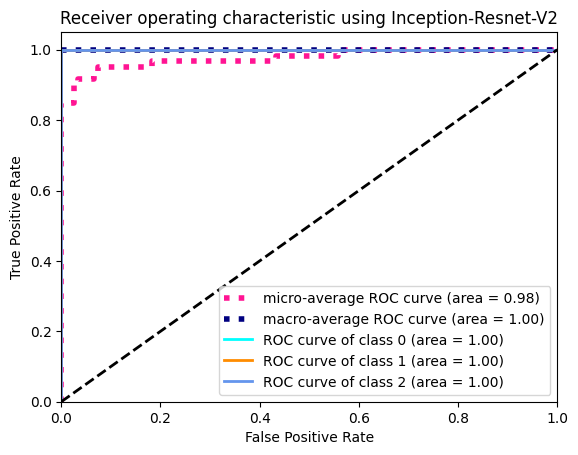

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(training_classes))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(training_classes)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(training_classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(training_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic using Inception-Resnet-V2')
plt.legend(loc="lower right")
plt.show()


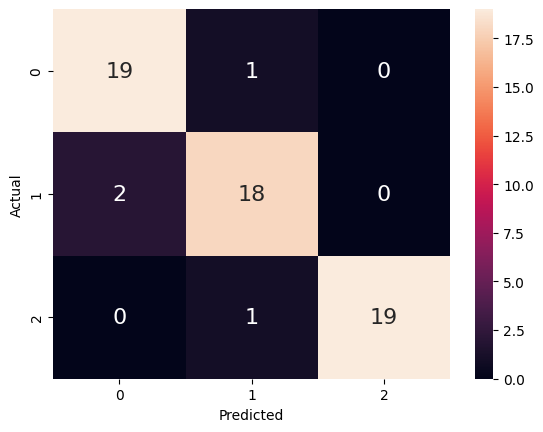

In [ ]:
data = {'y_Actual': [np.where(r==1)[0][0] for r in np.asarray(result_inception_resnet_v2['ground_truths'])],
        'y_Predicted': [np.where(r==1)[0][0] for r in pred]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16})
plt.show()

In [ ]:
score, acc = inception_resnet_V2.evaluate(val_images, val_labels, verbose = 0)

In [ ]:
print(acc)

0.8958333134651184


In [ ]:
saved_model_path = "model"
inception_V3.save(saved_model_path)

NameError: ignored

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [ ]:
tfjs.converters.save_keras_model(inception_V3,'OutputModel')

In [ ]:
!zip -r /content/tfjs_model.zip /content/OutputModel

In [ ]:
pwd

In [ ]:
retrain = tf.keras.models.load_model("./unet_lane_weights.h5")

In [ ]:
.tfjs.converters.save_keras_model(inception_V3,'OutputModel')

In [ ]:
inception_resnet_V2.summary()

In [ ]:
os.chdir('/content')

In [ ]:
os.chdir('paddy_disease_classification/testing/Leaf smut')
test_image = plt.imread('DSC_0293.JPG')
img = keras.preprocessing.image.load_img('DSC_0293.JPG', target_size=(299,299, 3))
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.inception_v3.preprocess_input(img)
plt.imshow(test_image)
os.chdir('/content')

In [ ]:
layer_name = 'block8_1_conv'

# Taking output from 'block8_1_conv'
layer_output = inception_resnet_V2.get_layer(layer_name).output

# Generating a substance model from the pre_trained_model.
# model with input layer of pre_trained_model and output layer of 'mixed_7a'
feature_extraction_model_1 = tf.keras.Model(inputs=inception_resnet_V2.input, outputs=layer_output)

# Extracting the features
result = feature_extraction_model_1.predict(img)
print(result.shape)
print(inception_resnet_V2.predict(img)[0])

In [ ]:

'''	Plotting Various Features obtained from feature_extraction_model. '''
plot_limit = 4
index = 1
i=1500
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, i-1])
		index += 1;i-=1
# show the figure
plt.show()
# Saving the Plot for future reference.
plt.savefig('Activations1.png')

In [ ]:
# PLoting various features from the feature_extraction_model
plot_limit = 4
index = 1
layer_no = 1087
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, layer_no],aspect="auto")
		index += 1;layer_no -= 1;
# show the figure
plt.show()
plt.savefig('Activations2.png')

In [ ]:
# Pre trained model
inception_V3_pre_trained = InceptionV3(include_top=True, weights='imagenet')

In [ ]:
for layer in inception_V3_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='softmax')(inception_V3_pre_trained.output)
inception_V3 = Model(inputs=inception_V3_pre_trained.input, outputs=predictions)

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.9999, epsilon=1e-08,
    amsgrad=True, name='Adam' )

inception_V3.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy',tf.keras.metrics.AUC()])

EPOCHS = 20
history_inception_V3 = inception_V3.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    batch_size=10,
    validation_data=(val_images, val_labels)
)

In [ ]:
acc = [0.4544,0.6605,0.7400,0.7950,0.8365,0.8905,0.9058,0.9252,0.9321,0.9429,0.9445,0.9606,0.9722,0.9769,0.9615,0.9730,0.9745,0.9815,0.9884,0.9892]

val_acc = [0.5100,0.7292,0.8333,0.8333,0.8750,0.8758,0.8967,0.8958,0.9050,0.8958,0.9267,0.9583,0.9792,0.9575,0.9375,0.9367,0.9475,0.9583,0.9575,0.9575]

loss = [1.0977,1.0912,1.0798,1.0698,1.0615,1.0542,1.0490,1.0429,1.0398,1.0377,1.0318,1.0332,1.0300,1.0284,1.0277,1.0284,1.0258,1.0247,1.0229,1.0248]
val_loss = [1.0927,1.0836,1.0744,1.0634,1.0559,1.0484,1.0451,1.0425,1.0417,1.0389,1.0372,1.0335,1.0323,1.0325,1.0325,1.0322,1.0293,1.0271,1.0279,1.0297]


# loss: 1.0977 - accuracy: 0.4144 - auc: 0.5312 - val_loss: 1.0927 - val_accuracy: 0.5000 - val_auc: 0.6842
# loss: 1.0912 - accuracy: 0.6505 - auc: 0.6614 - val_loss: 1.0836 - val_accuracy: 0.7292 - val_auc: 0.7574
# loss: 1.0798 - accuracy: 0.7500 - auc: 0.7930 - val_loss: 1.0744 - val_accuracy: 0.8333 - val_auc: 0.8835
# loss: 1.0698 - accuracy: 0.7940 - auc: 0.8866 - val_loss: 1.0634 - val_accuracy: 0.8333 - val_auc: 0.9154
# loss: 1.0615 - accuracy: 0.8565 - auc: 0.9225 - val_loss: 1.0559 - val_accuracy: 0.8750 - val_auc: 0.9593
# loss: 1.0542 - accuracy: 0.9005 - auc: 0.9503 - val_loss: 1.0484 - val_accuracy: 0.8958 - val_auc: 0.9596
# loss: 1.0490 - accuracy: 0.8958 - auc: 0.9587 - val_loss: 1.0451 - val_accuracy: 0.9167 - val_auc: 0.9591
# loss: 1.0429 - accuracy: 0.9352 - auc: 0.9778 - val_loss: 1.0425 - val_accuracy: 0.8958 - val_auc: 0.9599
# loss: 1.0398 - accuracy: 0.9421 - auc: 0.9796 - val_loss: 1.0417 - val_accuracy: 0.8750 - val_auc: 0.9629
# loss: 1.0377 - accuracy: 0.9329 - auc: 0.9798 - val_loss: 1.0389 - val_accuracy: 0.8958 - val_auc: 0.9528
# loss: 1.0318 - accuracy: 0.9745 - auc: 0.9883 - val_loss: 1.0372 - val_accuracy: 0.9167 - val_auc: 0.9746
# loss: 1.0332 - accuracy: 0.9606 - auc: 0.9744 - val_loss: 1.0335 - val_accuracy: 0.9583 - val_auc: 0.9830
# loss: 1.0300 - accuracy: 0.9722 - auc: 0.9899 - val_loss: 1.0323 - val_accuracy: 0.9792 - val_auc: 0.9775
# loss: 1.0284 - accuracy: 0.9769 - auc: 0.9911 - val_loss: 1.0325 - val_accuracy: 0.9375 - val_auc: 0.9721
# loss: 1.0277 - accuracy: 0.9815 - auc: 0.9940 - val_loss: 1.0325 - val_accuracy: 0.9375 - val_auc: 0.9628
# loss: 1.0284 - accuracy: 0.9630 - auc: 0.9877 - val_loss: 1.0322 - val_accuracy: 0.9167 - val_auc: 0.9604
# loss: 1.0258 - accuracy: 0.9745 - auc: 0.9919 - val_loss: 1.0293 - val_accuracy: 0.9375 - val_auc: 0.9673
# loss: 1.0247 - accuracy: 0.9815 - auc: 0.9928 - val_loss: 1.0271 - val_accuracy: 0.9583 - val_auc: 0.9692
# loss: 1.0229 - accuracy: 0.9884 - auc: 0.9984 - val_loss: 1.0279 - val_accuracy: 0.9375 - val_auc: 0.9690
# loss: 1.0248 - accuracy: 0.9792 - auc: 0.9848 - val_loss: 1.0297 - val_accuracy: 0.9375 - val_auc: 0.9596]

In [ ]:
acc = history_inception_V3.history['accuracy']
val_acc = history_inception_V3.history['val_accuracy']

loss = history_inception_V3.history['loss']
val_loss = history_inception_V3.history['val_loss']

epochs_range = range(20)
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right',fontsize=20)
plt.title('Accuracy Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label = 'validation Loss')
plt.legend(loc='upper right',fontsize=20)
plt.title('Loss Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
print(len(acc))
tmplist = []
t = 0
for i in range(0,len(acc)):
  tmplist.append(acc[i])
  tmplist.append((acc[i-1]+acc[i])/2)
print(tmplist)

print(len(acc))
tmplist2 = []
t = 0
for i in range(0,len(loss)):
  tmplist2.append(loss[i])
  tmplist2.append((loss[i-1]+loss[i])/2)
print(tmplist)

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [ ]:
# export_path_sm = "./inception_V3"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [ ]:
def Get_Results_Inception_V3(folder):
  '''
    Generates results for Inception_Resnet_V2 model
      Folder : (str). : Image_directory
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  predicts = []

  for image in tqdm(list(os.listdir(current_path))):
    # img = cv2.imread(image)
    # median = cv2.medianBlur(img, 5)
    # im = Image.fromarray(median)
    # im.save(image)

    img = keras.preprocessing.image.load_img(image, target_size=(299,299, 3))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    result_inception_v3['image_names'].append(image)
    predicts.append(inception_V3.predict(img)[0])

    if (folder=='Bacterial leaf blight'):
      result_inception_v3['ground_truths'].append(np.asarray([1,0,0]))
    elif (folder=='Brown spot'):
      result_inception_v3['ground_truths'].append(np.asarray([0,0,1]))
    else:
      result_inception_v3['ground_truths'].append(np.asarray([0,1,0]))

  result_inception_v3['predictions'].append(predicts)
  os.chdir(previous_path)

In [ ]:
result_inception_v3 = {'predictions':[],'image_names':[],'ground_truths':[]}
os.chdir('paddy_disease_classification/testing')

for folder in training_classes:
  Get_Results_Inception_V3(folder)

os.chdir('/content')
result_inception_v3['predictions'] = np.asarray(result_inception_v3['predictions']).reshape((60, 3))

In [ ]:
print(np.asarray(result_inception_v3['ground_truths']))
print(np.asarray(result_inception_v3['predictions']))
print(np.asarray(result_inception_v3['ground_truths']).shape)
print(np.asarray(result_inception_v3['predictions']).shape)

In [ ]:
pred = np.asarray(result_inception_v3['predictions'])
pred = np.argmax(pred, axis=1).reshape(-1)
pred = np.asarray(np.eye(len(training_classes),dtype=int)[pred])
print(pred)
print(pred.shape)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(training_classes)):
    fpr[i], tpr[i], _ = roc_curve(result_inception_v3['ground_truths'][i], result_inception_v3['predictions'][i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.asarray(result_inception_v3['ground_truths']).ravel(),np.asarray(result_inception_v3['predictions']).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(training_classes))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(training_classes)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(training_classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(training_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic using Inception-V3')
plt.legend(loc="lower right")
plt.show()

In [ ]:
data = {'y_Actual': [np.where(r==1)[0][0] for r in np.asarray(result_inception_v3['ground_truths'])],
        'y_Predicted': [np.where(r==1)[0][0] for r in pred]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
saved_model_path = "model"
inception_V3.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [ ]:
tfjs.converters.save_keras_model(inception_V3,'OutputModel')

In [ ]:
!zip -r /content/tfjs_model /OutputModel

In [ ]:
# plt.plot(history_inception_resnet_v2.history['auc_01'])

In [ ]:
inception_V3.summary()

In [ ]:
os.chdir('/content')

In [ ]:
os.chdir('paddy_disease_classification/testing/Leaf smut')
test_image = plt.imread('DSC_0293.JPG')
img = keras.preprocessing.image.load_img('DSC_0293.JPG', target_size=(299,299, 3))
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.inception_v3.preprocess_input(img)
plt.imshow(test_image)
os.chdir('/content')

In [ ]:
layer_name = 'conv2d_302'

# Taking output from 'block8_1_conv'
layer_output = inception_V3.get_layer(layer_name).output

# Generating a substance model from the pre_trained_model.
# model with input layer of pre_trained_model and output layer of 'mixed_7a'
feature_extraction_model_2 = tf.keras.Model(inputs=inception_V3.input, outputs=layer_output)

# Extracting the features
result = feature_extraction_model_2.predict(img)
print(result.shape)

In [ ]:

'''	Plotting Various Features obtained from feature_extraction_model. '''
plot_limit = 4
index = 1
i=96
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, i-1])
		index += 1;i-=1
# show the figure
plt.show()
# Saving the Plot for future reference.
plt.savefig('Activations1.png')

In [ ]:
# PLoting various features from the feature_extraction_model
plot_limit = 4
index = 1
layer_no = 32
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
for _ in range(plot_limit):
	for _ in range(plot_limit):
		# specify subplot and turn of axis
		ax = plt.subplot(plot_limit, plot_limit, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(result[0, :, :, layer_no],aspect="auto")
		index += 1;layer_no -= 1;
# show the figure
plt.show()
plt.savefig('Activations2.png')

In [ ]:
def load_image_resnet(image_path):
    '''
      Converts the image to size = (299,299,3) and normalizes the data
      Args :
      image_path : str. Image path for processing the image
    '''
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    # Normalizing the image
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
os.chdir('paddy_disease_classification/train')

channels = 3

train_images_resnet = np.ndarray(shape=(len(img_name_train), 224, 224, channels), dtype=np.float32)
train_labels_resnet = np.ndarray(shape=(len(output_label_train), 3 ), dtype=np.float32)
val_images_resnet = np.ndarray(shape=(len(img_name_val), 224, 224, channels), dtype=np.float32)
val_labels_resnet = np.ndarray(shape=(len(output_label_val), 3 ), dtype=np.float32)

i=0
for image in tqdm(list(img_name_train)):
  x, path = load_image_resnet(image)
  train_images_resnet[i] = x
  train_labels_resnet[i] = np.asarray(output_label_train[i])
  i += 1


i=0
for image in tqdm(list(img_name_val)):
  x, path = load_image_resnet(image)
  val_images_resnet[i] = x
  os.chdir('/content')
  val_labels_resnet[i] = np.asarray(output_label_val[i])
  i += 1

os.chdir('/content')

In [ ]:
train_images.shape, train_labels.shape

In [ ]:
# Pre trained model
resnet_50_pre_trained = ResNet50(include_top=True, weights='imagenet')

In [ ]:
for layer in resnet_50_pre_trained.layers:
    layer.trainable = True

predictions = Dense(3, activation='softmax')(resnet_50_pre_trained.output)
resnet_50 = Model(inputs=resnet_50_pre_trained.input, outputs=predictions)

In [ ]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.9999, epsilon=1e-08,
    amsgrad=True, name='Adam' )

resnet_50.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy',tf.keras.metrics.AUC()])

EPOCHS = 20
history_resnet_50 = resnet_50.fit(
    train_images_resnet, train_labels_resnet,
    epochs=EPOCHS,
    batch_size=20
)

In [ ]:
acc = history_resnet_50.history['accuracy']
# val_acc = history_resnet_50.history['val_accuracy']

loss = history_resnet_50.history['loss']
# val_loss = history_resnet_50.history['val_loss']

epochs_range = range(EPOCHS)
plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label = 'validation Accuracy')
plt.legend(loc='lower right',fontsize=20)
plt.title('Accuracy Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label = 'validation Loss')
plt.legend(loc='upper right',fontsize=20)
plt.title('Loss Plot',fontsize=30)
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Loss')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# # saving the model

# export_path_keras = "./model.h5"
# print(export_path_keras)

# model.save(export_path_keras)

In [ ]:
# export_path_sm = "./inception_V3"
# print(export_path_sm)

# tf.saved_model.save(model, export_path_sm)

In [ ]:
# !zip -r /content/PaddyNet /content/paddynet
# files.download("PaddyNet.zip")

In [ ]:
def Get_Resnet_50(folder):
  '''
    Generates results for Inception_Resnet_V2 model
      Folder : (str). : Image_directory
  '''
  previous_path = os.getcwd()
  os.chdir(folder)
  current_path = os.getcwd()
  predicts = []

  for image in tqdm(list(os.listdir(current_path))):
    # img = cv2.imread(image)
    # median = cv2.medianBlur(img, 5)
    # im = Image.fromarray(median)
    # im.save(image)

    img = keras.preprocessing.image.load_img(image, target_size=(299,299, 3))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    result_resnet_50['image_names'].append(image)
    predicts.append(resnet_50.predict(img)[0])

    if (folder=='Bacterial leaf blight'):
      result_resnet_50['ground_truths'].append(np.asarray([1,0,0]))
    elif (folder=='Brown spot'):
      result_resnet_50['ground_truths'].append(np.asarray([0,0,1]))
    else:
      result_resnet_50['ground_truths'].append(np.asarray([0,1,0]))

  result_resnet_50['predictions'].append(predicts)
  os.chdir(previous_path)

In [ ]:
result_resnet_50 = {'predictions':[],'image_names':[],'ground_truths':[]}
os.chdir('paddy_disease_classification/testing')

for folder in training_classes:
  Get_Resnet_50(folder)

os.chdir('/content')
result_resnet_50['predictions'] = np.asarray(result_resnet_50['predictions']).reshape((60, 3))

In [ ]:
print(np.asarray(result_resnet_50['ground_truths']))
print(np.asarray(result_resnet_50['predictions']))
print(np.asarray(result_resnet_50['ground_truths']).shape)
print(np.asarray(result_resnet_50['predictions']).shape)

In [ ]:
pred = np.asarray(result_resnet_50['predictions'])
pred = np.argmax(pred, axis=1).reshape(-1)
pred = np.asarray(np.eye(len(training_classes),dtype=int)[pred])
print(pred)
print(pred.shape)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(training_classes)):
    fpr[i], tpr[i], _ = roc_curve(result_resnet_50['ground_truths'][i], result_resnet_50['predictions'][i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.asarray(result_resnet_50['ground_truths']).ravel(),np.asarray(result_resnet_50['predictions']).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(training_classes))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(training_classes)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(training_classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(training_classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to Paddy Disease Classifer')
plt.legend(loc="lower right")
plt.show()


In [ ]:
data = {'y_Actual': [np.where(r==1)[0][0] for r in np.asarray(result_resnet_50['ground_truths'])],
        'y_Predicted': [np.where(r==1)[0][0] for r in pred]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
os.chdir('/content')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])